In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Importing csv file 
data = pd.read_csv('Churn_Modelling.csv')
print("Data loaded successfully.")
print(data.head())


Data loaded successfully.
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.

In [2]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print("Dropped unnecessary columns.")

label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

X = data.drop('Exited', axis=1)
y = data['Exited']
print("Data split into features and target variable.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Features standardized.")


Dropped unnecessary columns.
Categorical variables encoded.
Data split into features and target variable.
Data split into training and testing sets.
Features standardized.


In [3]:
# Training few models
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
accuracy1 = model_lr.score(X_test, y_test)
print("Logistic Regression model trained with accuracy:", accuracy1)

model_svm = SVC(probability=True)
model_svm.fit(X_train, y_train)
accuracy2 = model_svm.score(X_test, y_test)
print("SVM model trained with accuracy:", accuracy2)

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
accuracy3 = model_knn.score(X_test, y_test)
print("KNN model trained with accuracy:", accuracy3)

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
accuracy4 = model_dt.score(X_test, y_test)
print("Decision Tree model trained with accuracy:", accuracy4)

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
accuracy5 = model_rf.score(X_test, y_test)
print("Random Forest model trained with accuracy:", accuracy5)

model_gbc = GradientBoostingClassifier()
model_gbc.fit(X_train, y_train)
accuracy6 = model_gbc.score(X_test, y_test)
print("Gradient Boosting Classifier model trained with accuracy:", accuracy6)


Logistic Regression model trained with accuracy: 0.8155
SVM model trained with accuracy: 0.8575
KNN model trained with accuracy: 0.8355
Decision Tree model trained with accuracy: 0.782
Random Forest model trained with accuracy: 0.8665
Gradient Boosting Classifier model trained with accuracy: 0.865


Predictions made for Logistic Regression.
Confusion Matrix for Logistic Regression:
[[1559   48]
 [ 321   72]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000


ROC AUC Score for Logistic Regression: 0.76


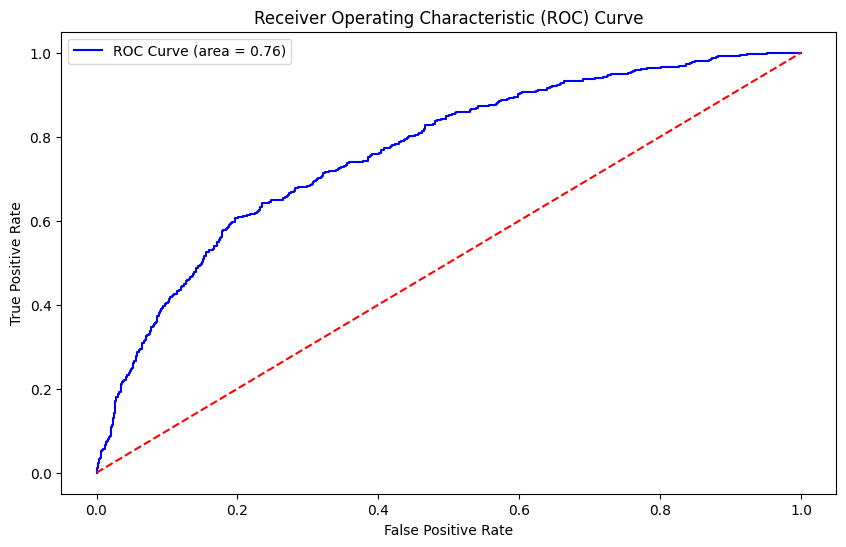

In [4]:
# Making predictions & ROC curve & AUC score for Logistic Regression
y_pred = model_lr.predict(X_test)
y_pred_prob = model_lr.predict_proba(X_test)[:, 1]
print("Predictions made for Logistic Regression.")

print("Confusion Matrix for Logistic Regression:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report for Logistic Regression:")
cr = classification_report(y_test, y_pred)
print(cr)

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\nROC AUC Score for Logistic Regression: {:.2f}".format(roc_auc))

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Feature importance calculated for Logistic Regression.


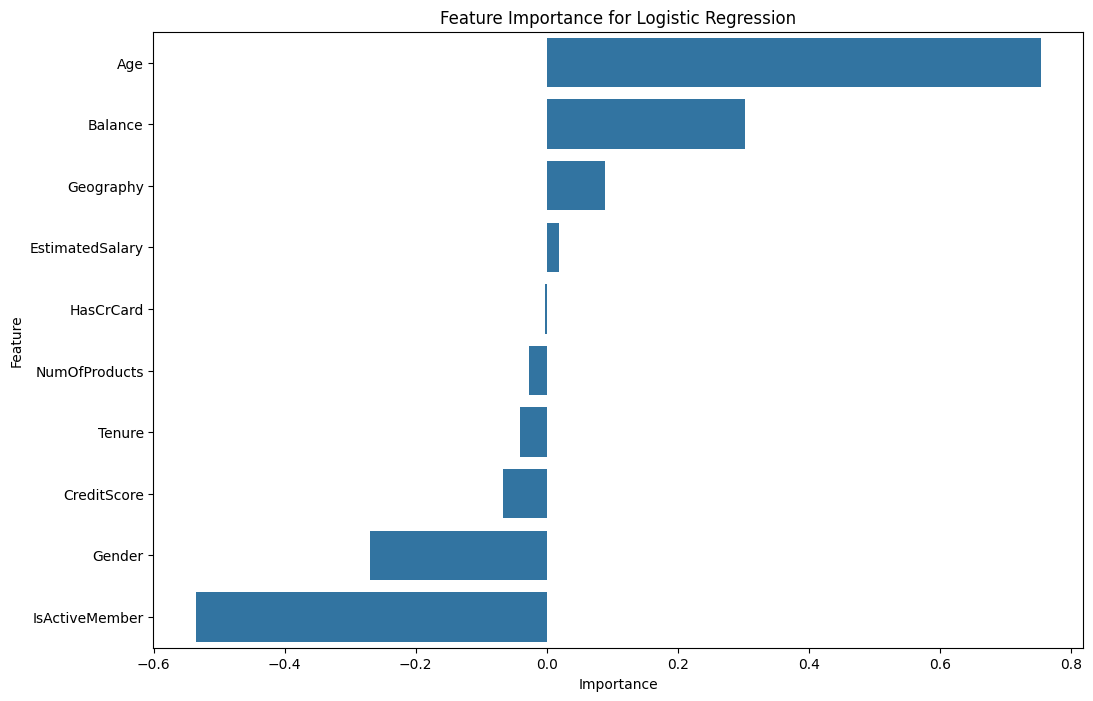

In [5]:
# Feature importance for Logistic Regression
coefficients = model_lr.coef_[0]
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature importance calculated for Logistic Regression.")

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Logistic Regression')
plt.show()


Performance Summary:
                 Model  Accuracy
0  Logistic Regression    0.8155
1                  SVM    0.8575
2                  KNN    0.8355
3        Decision Tree    0.7820
4        Random Forest    0.8665
5    Gradient Boosting    0.8650


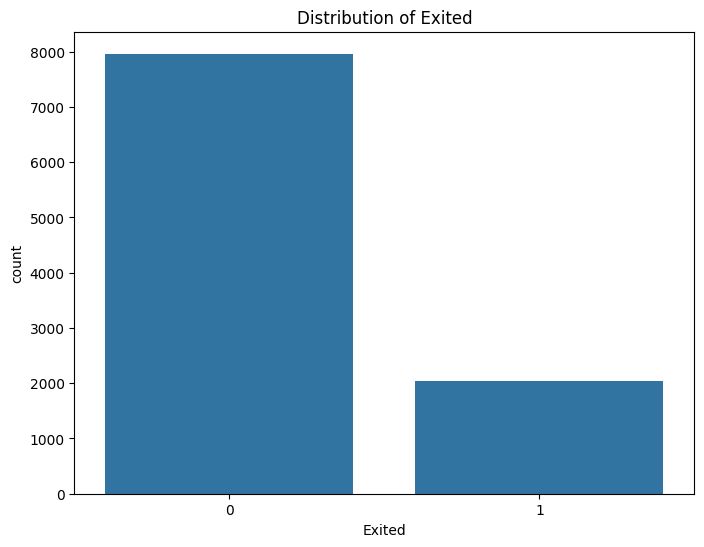

In [6]:
# Summary DataFrame
performance_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6]
})
print("Performance Summary:")
print(performance_summary)

# Distribution of 'Exited' 
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Exited')
plt.show()